In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, LSTM, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# MNIST veri kümesini yükle
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Verileri yeniden şekillendirme
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [ ]:
# Verileri normalize etme
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Hedef değişkenleri kategorik hale getirme
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Model tanımlama
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# LSTM layer
model.add(Reshape((-1, 128)))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(Flatten())

# Fully connected layerlar
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
# Model derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Model eğitimi
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 19s 11ms/step - loss: 0.4391 - accuracy: 0.8642 - val_loss: 0.1179 - val_accuracy: 0.9647
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1192 - accuracy: 0.9661 - val_loss: 0.0692 - val_accuracy: 0.9794
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0836 - accuracy: 0.9765 - val_loss: 0.0617 - val_accuracy: 0.9825
Epoch 4/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0652 - accuracy: 0.9811 - val_loss: 0.0575 - val_accuracy: 0.9820
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0458 - accuracy: 0.9865 - val_loss: 0.0538 - val_accuracy: 0.9847
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0476 - val_accuracy: 0.

In [ ]:
# Model değerlendirme
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.9890999794006348
Test loss: 0.08773528039455414


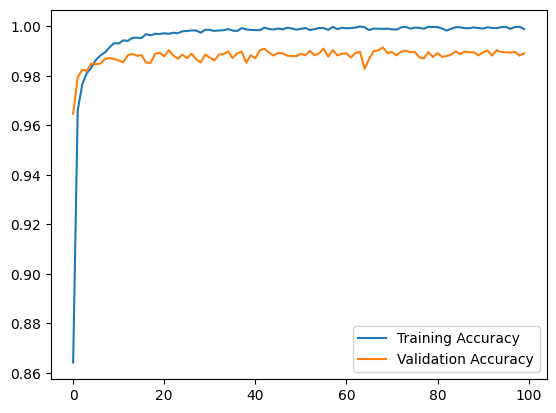

In [ ]:
import matplotlib.pyplot as plt

# Accuracy değerleri
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Eğitim ve doğrulama Accuracy değerlerini grafik olarak çizdirme
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

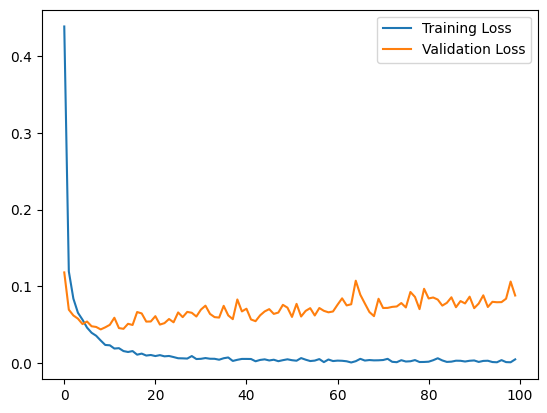

In [ ]:
# Loss değerleri
loss = history.history['loss']
val_loss = history.history['val_loss']

# Eğitim ve doğrulama Loss değerlerini grafik olarak çizdirme
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()